# Решение нелинейных уравнений

Постановка задачи: дана функция 
$$
f: \mathbf{R} \to \mathbf{R}
$$

найти решения уравнения 
$$
f(x) = 0\;.
$$


In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x20bb8e2a5c0>

In [2]:
def f(x):
    return x**3 - 3*x**2 + 5
def g(x):
    return x**3

<IPython.core.display.Javascript object>


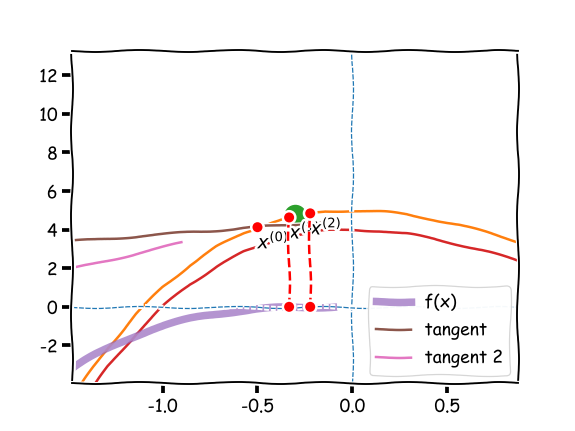

In [3]:
xx = np.linspace(-2, 5)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
ax.plot(xx, f(xx))

Сколько корней у данной функции?

$\qquad\qquad \Longrightarrow$ Ограничим поиск действительными корнями. Полиномы рассмотрим отдельно.



### Первый шаг: изоляция корней

In [4]:
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xx, f(xx))
plt.plot([-1.8, -0.3], [f(-1.8), f(-0.3)], 'o', ms=18, mec='none')

$$
f(x) = x^3 - 3 x^2 + 4
$$

In [5]:
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xx, (lambda x: x**3 - 3*x**2 + 4)(xx))

## Метод бисекции

Предположим, что корень уже изолирован на интервале $[a, b]$.

Вычислим $x_0 = (a + b) / 2$ и рассмотрим интервалы $[a, x_0]$ и $[x_0, b]$. Выберем тот из них, который содержит искомый корень, дальше повторяем пока $| x_m - x_{m-1} | > \varepsilon$.


$\color{red}{+}$ метод гарантированно сходится: на каждом шаге *корень остается изолированным*

$\color{red}{-}$ имеет линейную скорость сходимости: $\delta_{m+1} = \delta_{m} / 2$

## Методы секущих, ложного положения, Риддера и пр.

$\color{red}{+}$ слегка улучшают скорость сходимости

$\color{red}{-}$ не поддерживают изолированность корня $\Longrightarrow$ не гарантируют сходимость

## Метод Брента

Гибридный метод. Использует сочетание обратной параболической интерполяции и шаги деления отрезка пополам.

In [ ]:
from scipy.optimize import brentq
xp = brentq(f, -1.8, -0.3)

print(xp, f(xp))

Cм. напр. Numerical Recipes.

## Метод Ньютона-Рафсона

Обозначим через $x_*$ (неизвестный) корень функции $f(x)$. Предположим, что известно $x_0$, такое что $\delta = x_* - x_0 \ll 1$

Тогда 

$$
0 = f(x_0 + \delta) = f(x_0) + f'(x_0)\, \delta + f''(x_0) \frac{\delta^2}{2} + \cdots\;,
$$


и итеративный процесс

$$
x_{j+1} = x_j - \frac{f(x_j)}{f'(x_j)}
$$

сходится к $x_*$.

! Либо получается окончательно посчитать производную на бумаге, либо используй другой метод!

Работает так: Строим касательную к точку x_0, там где пересекается с осью абсцисс -- строим проекцию на график и так повторяем действия

In [6]:
def fprime(x):
    return 3 * x * (x - 2)
def gprime(x):
    return 3 * x ** 2

In [7]:
# By Denis 1

x = np.linspace(-1.7, -0.1)

x0 = -0.5   # initial guess

plt.plot(x, g(x), lw=6, label='f(x)', alpha=0.7)

# plot the tangent line
xx = np.asarray([-1.8, -0.15])
plt.plot(xx, gprime(x0)*(xx - x0) + f(x0), '-', label='tangent')

# initial point
plt.plot([x0], [f(x0)], 'ro', ms=8, mec='none')
plt.annotate(r'$x^{(0)}$',
             xy=(x0, f(x0)),
             xytext=(x0, f(x0)-1.1),
             fontsize=15,
             ) #arrowprops=dict(facecolor='C1', shrink=0.5))

# tangent crossing the curve & the zero
xc = -g(x0)/gprime(x0) + x0
plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(1)}$',
             xy=(xc, f(xc)),
             xytext=(xc, f(xc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_1.jpg')


# 2nd tangent
xx1 = np.array([-1.8, -0.9])
plt.plot(xx1, fprime(xc)*(xx1 - xc) + f(xc), '-', label='tangent 2')

# 2nd tangent crossing the curve & the zero
xcc = -g(xc)/gprime(xc) + xc
plt.plot([xcc, xcc], [0, f(xcc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(2)}$',
             xy=(xcc, f(xcc)),
             xytext=(xcc, f(xcc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_2.jpg')


In [ ]:

x = np.linspace(-1.7, -0.1)

x0 = -0.5   # initial guess

plt.plot(x, f(x), lw=6, label='f(x)', alpha=0.7)

# plot the tangent line
xx = np.asarray([-1.8, -0.15])
plt.plot(xx, fprime(x0)*(xx - x0) + f(x0), '-', label='tangent')

# initial point
plt.plot([x0], [f(x0)], 'ro', ms=8, mec='none')
plt.annotate(r'$x^{(0)}$',
             xy=(x0, f(x0)),
             xytext=(x0, f(x0)-1.1),
             fontsize=15,
             ) #arrowprops=dict(facecolor='C1', shrink=0.5))

# tangent crossing the curve & the zero
xc = -f(x0)/fprime(x0) + x0
plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(1)}$',
             xy=(xc, f(xc)),
             xytext=(xc, f(xc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_1.jpg')


# 2nd tangent
xx1 = np.array([-1.8, -0.9])
plt.plot(xx1, fprime(xc)*(xx1 - xc) + f(xc), '-', label='tangent 2')

# 2nd tangent crossing the curve & the zero
xcc = -f(xc)/fprime(xc) + xc
plt.plot([xcc, xcc], [0, f(xcc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(2)}$',
             xy=(xcc, f(xcc)),
             xytext=(xcc, f(xcc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_2.jpg')


Итеративный процесс Ньютона-Рафсона имеет квадратичную сходимость (если он сходится!):

$$
\epsilon_{j+1} \propto \epsilon_j^2
$$

(На шаге $j+1$ имеем

$$\epsilon_{j+1} = \epsilon_j - \frac{f(x_j)}{f'(x_j)}\;.$$ 

Вблизи корня $x_0$, разложим $f(x_j)$ и $f'(x_j)$ в ряд по степеням $\epsilon$ и приведем подобные.)

In [ ]:
# By Denis 2
x = np.linspace(-1.5, 3)

x0 = 2.08   # initial guess

plt.plot(x, g(x), lw=6, label='f(x)')

# plot the tangent line
xx = np.asarray([-1.5, 3])
plt.plot(xx, gprime(x0)*(xx - x0) + g(x0), '-', label='tangent')

# initial point
plt.plot([x0], [g(x0)], 'ro', ms=8, mec='none')

# tangent crossing the curve & the zero
xc = -g(x0)/gprime(x0) + x0
plt.plot([xc], [0], 'ro', ms=11, mec='none')

plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none')

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

In [ ]:
x = np.linspace(-1.5, 3)

x0 = 2.08   # initial guess

plt.plot(x, f(x), lw=6, label='f(x)')

# plot the tangent line
xx = np.asarray([-1.5, 3])
plt.plot(xx, fprime(x0)*(xx - x0) + f(x0), '-', label='tangent')

# initial point
plt.plot([x0], [f(x0)], 'ro', ms=8, mec='none')

# tangent crossing the curve & the zero
xc = -f(x0)/fprime(x0) + x0
plt.plot([xc], [0], 'ro', ms=11, mec='none')

plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none')

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

Как глобальный итеративный процесс, алгоритм Ньютона-Рафсона нестабилен.

Однако, если корни получены с невысокой точностью каким-либо иным методом, то одна-две итерации могут заметно улучшить точность.

## Вычисление корней полиномов

* Мы знаем число корней (включая комплексные)

* Многочлены высоких степеней численно неустойчивы

* Использование методов Ньютона и т.п. для нахождения корней многочленов не рекомендуется

### Метод сопровождающей матрицы

(англ companion matrix)

$$
\mathbf{A} = 
\begin{bmatrix}
-a_{n-1} & -a_{n-2} & \dots & -a_1 & -a_0 \\
1        &    0     & \dots & 0   & 0 \\
0        &    1     & \dots & 0   & 0 \\
&        &           \ddots &&    &   \\
0       &     0     & \dots & 1   & 0 
\end{bmatrix}
$$

Можно показать, что

$$
\det(\mathbf{A} - x \mathbf{I}) = x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0
$$

Пример:

$$
x^2 + 1 = 0
$$

In [ ]:
A = np.array([[0, -1],
              [1, 0]])

from numpy.linalg import eig
e, v = eig(A)
e

In [ ]:
# also check the condition number
from numpy.linalg import cond
cond(A)

C/C++/Fortran/... : Используйте LAPACK, *geev

## Решение систем нелинейных уравнений

Задача

\begin{gather}
\mathbf{f} : \mathbf{R}^n \to \mathbf{R}^n \\
\mathbf{f}(\mathbf{x}) = \mathbf{0}
\end{gather}


эквивалентна задаче поиска *глобального* минимума $F(\mathbf{x})$

$$
F(\mathbf{x}) = \sum_{j=1}^n f_j(\mathbf{x})^2 \;.
$$




# Вопросы для практических занятий и самостоятельной работы:


1. Показать, что для итеративного процесса Ньютона-Рафсона, последовательные приближения удовлетворяют соотношению
$
\epsilon_{j+1} = \epsilon_j^2 \dfrac{f''(x)}{f'(x)}
$
где $x$ есть точное значение корня уравнения $f(x)=0$.

2. Реализовать метод Ньютона-Рафсона и использовать его для решения уравнения $z^3 - 1 = 0$ для комплексного $z$. Описать и визуализировать области сходимости метода в комплексной плоскости. 

4. Написать программу нахождения корней квадратного уравнения. Обсудить вычислительную устойчивость алгоритма, в особенности в режиме существенно различающихся по абсолютной величине коэффициентов квадратного трехчлена.

5. Вычислить зависимость объема моля газа, описываемого уравнением ван дер Ваальса, от давления при постоянной температуре. Обратить особое внимание на область температур ниже критической температуры фазового перехода.

6. Реализовать метод нахождения корней многочлена с использованием сопровождающей матрицы. Полученные таким образом корни "отполировать" несколькими итерациями метода Ньютона-Рафсона. Нужны ли вторая и последующие итерации?